## Exploratory Data Analysis on an IMDb Member Data

In this notebook we will explore an IMDb user's data. You can download your own ratings and much more information of the films you rated on IMDb (you must have an account there to do that). Go to your profile page and click on **"Your Ratings"** button. From there click on the three vertical dots and click "Export" which downloads your data in the .csv file format.

Let's start with necessary imports:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
sns.set(style="darkgrid")
plt.style.use("seaborn-pastel")
# %matplotlib widget

I downloaded my data from the website, and let's first load the data here:

In [2]:
df = pd.read_excel("Omer Eker IMDb Ratings 2020-04-06.xlsx")
df.head()

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,tt0125439,5,2006-09-07,Notting Hill,https://www.imdb.com/title/tt0125439/,movie,7.1,124.0,1999,"Comedy, Drama, Romance",258381,1999-05-13,Roger Michell
1,tt0133093,10,2006-09-07,The Matrix,https://www.imdb.com/title/tt0133093/,movie,8.7,136.0,1999,"Action, Sci-Fi",1591123,1999-03-24,"Lilly Wachowski, Lana Wachowski"
2,tt0174856,9,2006-09-07,The Hurricane,https://www.imdb.com/title/tt0174856/,movie,7.6,146.0,1999,"Biography, Drama, Sport",88665,1999-09-17,Norman Jewison
3,tt0177971,8,2006-09-07,The Perfect Storm,https://www.imdb.com/title/tt0177971/,movie,6.4,130.0,2000,"Action, Adventure, Drama, Thriller",151065,2000-06-26,Wolfgang Petersen
4,tt0203755,7,2006-09-07,One Night at McCool's,https://www.imdb.com/title/tt0203755/,movie,6.1,93.0,2001,"Comedy, Crime",27925,2001-04-19,Harald Zwart


Each row represents a film or tv series etc. and the columns are:
* **Const**: Unique ID of the film
* **Your Rating**: User's rating for the film
* **Date Rated**: The date user rated the film
* **Title**: Title of the film
* **URL**: IMDb URL of the film
* **Title Type**: Title type (movie, tv-series, short, video, etc.
* **IMDb Rating**: Weighted average rating of the film
* **Runtime(mins)**: Runtime of the film in minutes
* **Year**: Release year of the film
* **Genres**: Genre of the film (Comedy, drama, horror etc.)
* **Num Votes**: The number of votes received by the film
* **Release Date**: Release date in YYYY-MM-DD format (datetime object)
* **Directors**: Directors of the film (some have multiple directors)

It shows that I rated 1093 titles:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Const           1093 non-null   object        
 1   Your Rating     1093 non-null   int64         
 2   Date Rated      1093 non-null   datetime64[ns]
 3   Title           1093 non-null   object        
 4   URL             1093 non-null   object        
 5   Title Type      1093 non-null   object        
 6   IMDb Rating     1093 non-null   float64       
 7   Runtime (mins)  1089 non-null   float64       
 8   Year            1093 non-null   int64         
 9   Genres          1093 non-null   object        
 10  Num Votes       1093 non-null   int64         
 11  Release Date    1080 non-null   datetime64[ns]
 12  Directors       1047 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(6)
memory usage: 111.1+ KB


### Distribution of User's Ratings
Distribution of the member's ratings are visualised in either bar chart (left) and a donut chart (right):
* Half of the ratings are either 6 or 7
* Majority of the ratings are in between 5 and 9

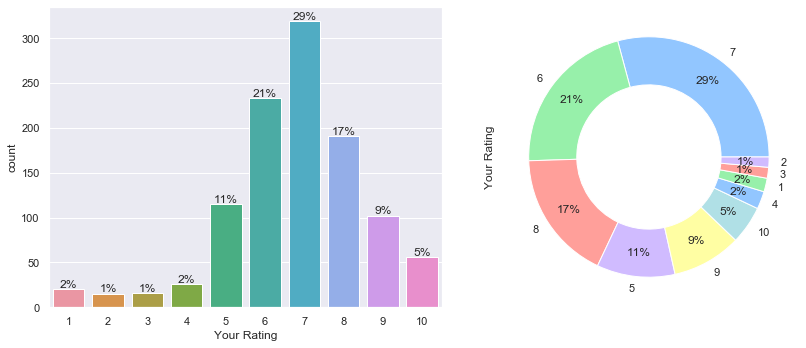

In [4]:
rating_counts = df["Your Rating"].value_counts().sort_index()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x=df["Your Rating"])

for i,rate in enumerate(rating_counts):
    plt.text(i,rate+2,f"{round(100*rate/df.shape[0])}%",ha="center")
    
plt.subplot(1,2,2)   
df["Your Rating"].value_counts().plot.pie(autopct="%.0f%%",pctdistance=0.8,wedgeprops=dict(width=0.4))

plt.tight_layout()
plt.show()

### Yearly Rating Trends

* I stated to give ratings since 2006 (right graph)
* The peak in the right graph in 2011 is where I took a decision to take rating more seriously, and start rating all the films I watched before
* The graph in the left shows that the majority of the films I rated were released in 90s and after
* In the same graph, I can relate the peak in 2003 to my BSc start where I started watching films overwhelmingly most of them was released at that year (If I'd started rating we could have seen the peak in 2003 in the right hand side graph too)
* Starting from 2015, the number of rated films have been linearly increasing

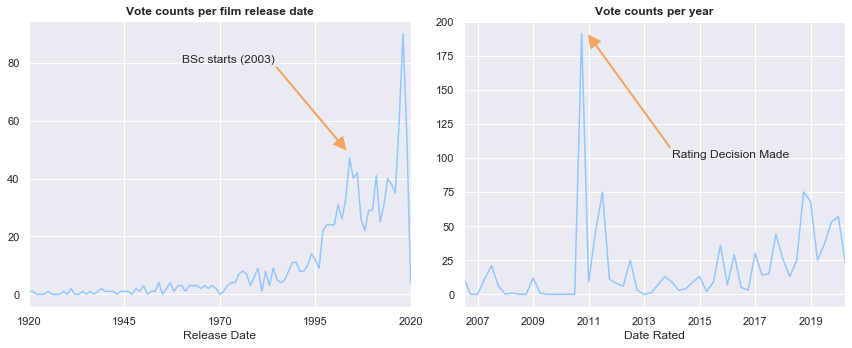

In [5]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df.groupby(pd.Grouper(key="Release Date",freq="1Y")).count()["Title"].plot()
plt.gca().annotate("BSc starts (2003)",xy=(date(2003,1,1),50),xytext=(date(1960,1,1),80),
                   arrowprops=dict(width=1,color="sandybrown"))
plt.title("Vote counts per film release date",fontweight="bold")
plt.subplot(1,2,2)
df.groupby(pd.Grouper(key="Date Rated",freq="1Q")).count()["Title"].plot()
plt.gca().annotate("Rating Decision Made",xy=(date(2011,1,1),190),xytext=(date(2014,1,1),100),
                  arrowprops=dict(color="sandybrown",width=1))
plt.title("Vote counts per year",fontweight="bold")
plt.tight_layout()
plt.show()

The graph below combines the two graphs above:
* y=x line is the most crowdy region as user's tend to watch that year's films more
* As can be seen at x=2011 user rated films from almost all previous year's releases

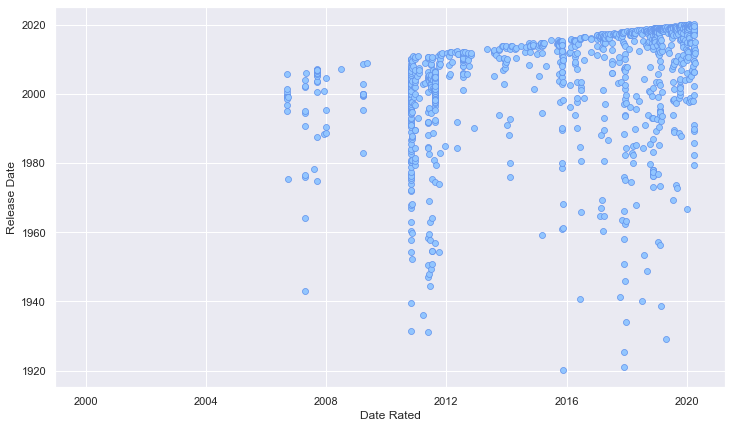

In [6]:
plt.figure(figsize=(12,7))
sns.scatterplot(y="Release Date",x="Date Rated",data=df,edgecolor="cornflowerblue")
plt.show()

### User's ratings vs IMDb weighted average ratings
Let's compare my ratings with the IMDb's weighted average ratings. The boxenplot graph below shows that they seem to correlate positively with some exceptions mainly in my low ratings:

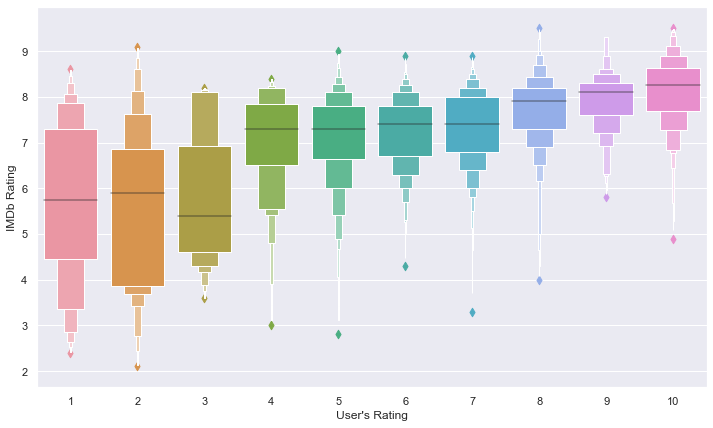

In [7]:
plt.figure(figsize=(12,7))
sns.boxenplot(x="Your Rating",y="IMDb Rating",data=df)
plt.xlabel("User's Rating")
# sns.swarmplot(x="Your Rating",y="IMDb Rating",data=df,color="cornflowerblue",alpha=0.4)
plt.show()

45% correlation between the users and IMDb's averages are calculated:

In [8]:
df[["Your Rating","IMDb Rating"]].corr()

,Your Rating,IMDb Rating
Your Rating,1.000000,0.453256
IMDb Rating,0.453256,1.000000


### Not much of a series fan

Almost all of my ratings come from "movie" ratings. I heavily tend to watch films rather than watching series. TV Mini Series which capture 0.7% of my ratings are mainly Netflix documentary or short series like Black Mirror:

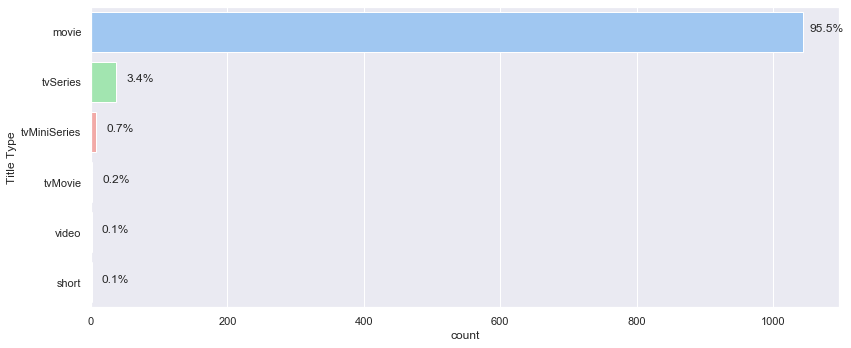

In [9]:
title_counts = df["Title Type"].value_counts()

plt.figure(figsize=(12,5))
sns.countplot(y="Title Type",data=df,order=title_counts.index)
for i,count in enumerate(title_counts):
    plt.text(count+35,i,f"{round(100*count/df.shape[0],1)}%",ha="center")
plt.tight_layout()
plt.show()

### Top 20 directors which I watched their films the most

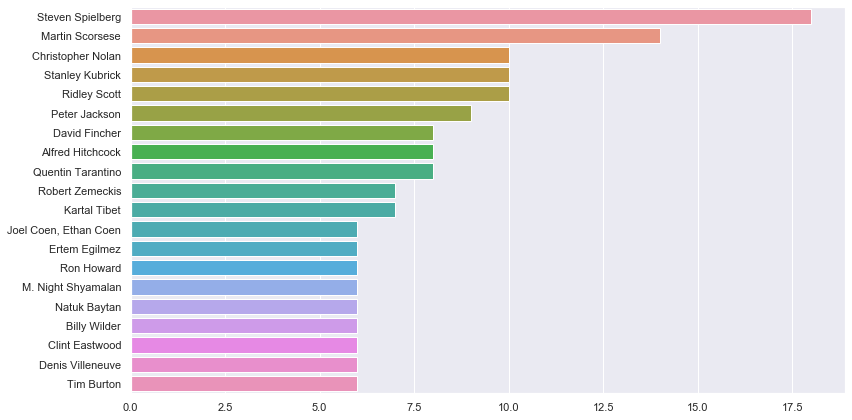

In [10]:
dir_counts = df.Directors.value_counts()[:20]

plt.figure(figsize=(12,6))
sns.barplot(y=dir_counts.index,x=dir_counts.values)
plt.tight_layout()
plt.show()

### Runtime distribution of the films

* Average (mean) runtime of the titles (films, series, etc.) is almost 2 hours
* It shows normal-like distribution with a longer tail in the positive side, which is due to the long total runtimes of series or documentary series.

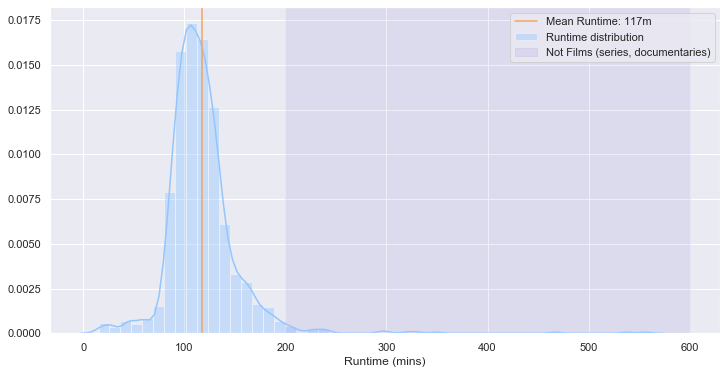

In [11]:
mean_runtime = df["Runtime (mins)"].mean()

plt.figure(figsize=(12,6))
sns.distplot(df["Runtime (mins)"].dropna(),label="Runtime distribution")
# plt.gca().set_yscale("log")

plt.gca().axvline(mean_runtime,color="sandybrown",label=f"Mean Runtime: {int(mean_runtime)}m")
plt.gca().axvspan(200,600,color="slateblue",alpha=0.1,label="Not Films (series, documentaries)")
plt.legend()
plt.show()

### Breakdown of the Genres

Since most titles are associated to multiple genres we can use a specific function to count and convert them to one hot encoded variables: **Count Vectorizer** NLP feature extraction function from Scikit-Learn library:

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b').fit(df["Genres"])
bag_of_genres = vec.transform(df["Genres"])

genres_dummy = pd.DataFrame(bag_of_genres.todense(),columns=vec.get_feature_names())
df[vec.get_feature_names()] = genres_dummy
df.head()

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,tt0125439,5,2006-09-07,Notting Hill,https://www.imdb.com/title/tt0125439/,movie,7.1,124.0,1999,"Comedy, Drama, Romance",...,0,0,1,0,0,0,0,0,0,0
1,tt0133093,10,2006-09-07,The Matrix,https://www.imdb.com/title/tt0133093/,movie,8.7,136.0,1999,"Action, Sci-Fi",...,0,0,0,1,0,0,0,0,0,0
2,tt0174856,9,2006-09-07,The Hurricane,https://www.imdb.com/title/tt0174856/,movie,7.6,146.0,1999,"Biography, Drama, Sport",...,0,0,0,0,0,1,0,0,0,0
3,tt0177971,8,2006-09-07,The Perfect Storm,https://www.imdb.com/title/tt0177971/,movie,6.4,130.0,2000,"Action, Adventure, Drama, Thriller",...,0,0,0,0,0,0,0,1,0,0
4,tt0203755,7,2006-09-07,One Night at McCool's,https://www.imdb.com/title/tt0203755/,movie,6.1,93.0,2001,"Comedy, Crime",...,0,0,0,0,0,0,0,0,0,0


Now we have extra 26 one-hot-encoded variable for each genre that are concatenated to the end of our table. Let's calculate their frequencies:
* Tend to watch more Drama, Mystery, Thriller, Sci-Fi genres as their percentages are over the population averages (another notebook which gives interesting statistics of the IMDb's most recent statistics of the whole user population coming soon)

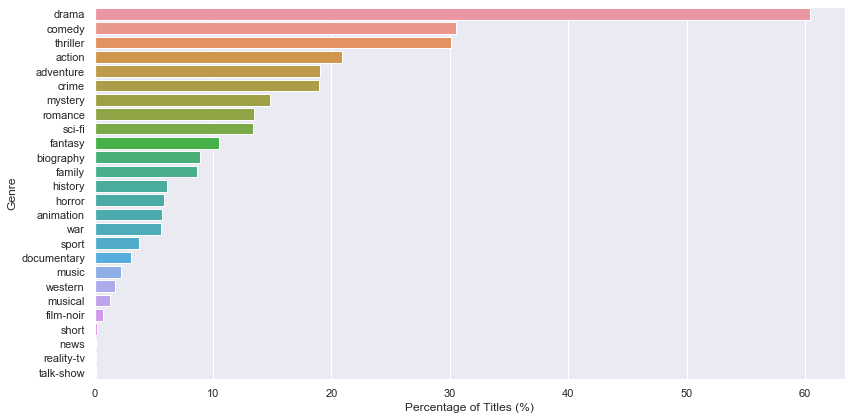

In [13]:
genre_counts = 100*df[vec.get_feature_names()].sum().sort_values(ascending=False)/df.shape[0]

plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.values,y=genre_counts.index,orient="h")
plt.xlabel("Percentage of Titles (%)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

### Future work

* This work can be extended by comparing user's stats with whole IMDb's user population averages
* The table can be extended by joining other tables from IMDb's open database: https://www.imdb.com/interfaces/
* After extending the table with other tables some frequency analysis can be made on Actors, Writers etc.